### Modeling Exercises - K Means

Do your work for this exercise in a notebook named ```modeling``` within your ```clustering-exercises``` repository.

**1.  Clustering with the Iris Dataset.  Using this lesson as a guide, perform clustering on the iris dataset.**

**a. Choose features other than the ones used in the lesson.**

In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
import viz_kmeans

import wrangle 

np.random.seed(4)

import pydataset
from pydataset import data

np.set_printoptions(suppress=True)

In [8]:
#acquire data
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [9]:
# choose features to cluster on 
X = iris[['sepal_width', 'petal_width']]

In [10]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [11]:
#create the model (specify three clusters), fit the model, use the model to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [12]:
#Add the cluster prediction to the original database

iris['cluster'] = kmeans.predict(X_scaled)
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


**b. Visualize the results of your clustering.**

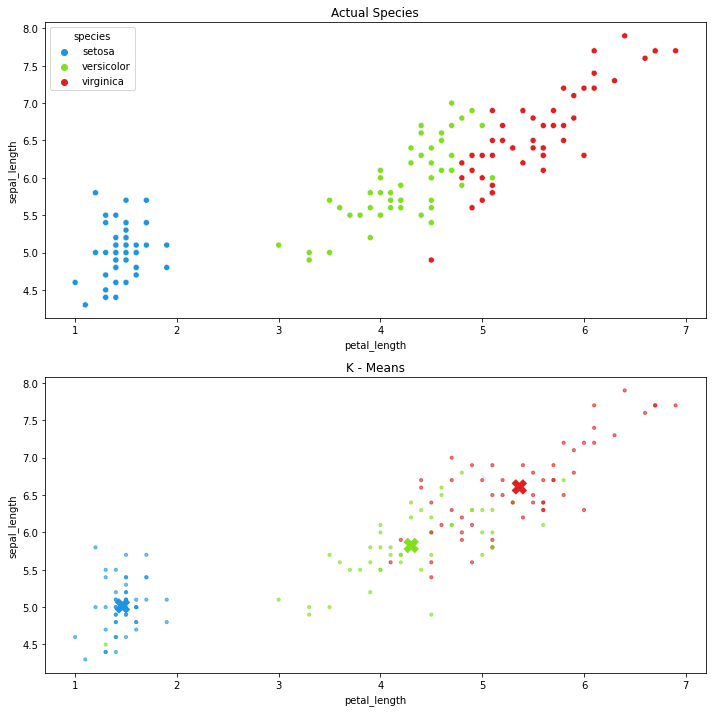

In [13]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

c. Use the elbow method to visually select a good value for k.

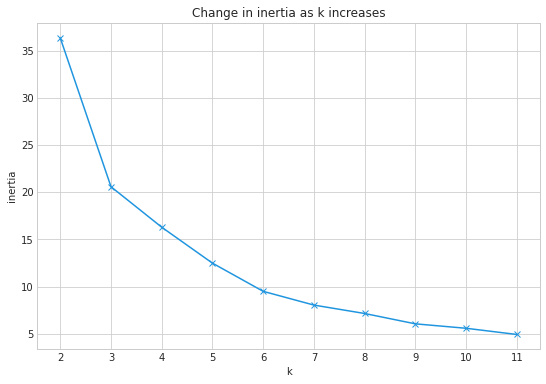

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Takeaway --
The elbow method shows 3 as a good value for k.

d. Repeat the clustering, this time with 3 different features.

In [15]:
# choose features to cluster on 
X = iris[['sepal_width', 'petal_width', 'sepal_length']]

In [16]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [17]:
#create the model (specify three clusters), fit the model, use the model to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
#Add the cluster prediction to the original database

iris['cluster_2'] = kmeans.predict(X_scaled)
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster_2
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1


b. Visualize the results of your clustering.

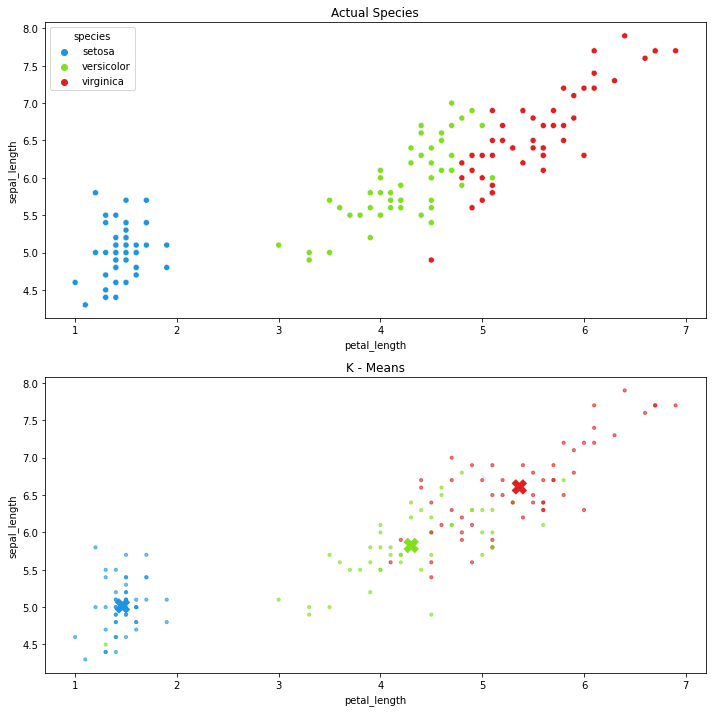

In [19]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [20]:
sql = 'select * from customers'

In [21]:
# acquire mall customers data using the query:

def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

def get_mall_customers(sql):
    url = get_db_url('mall_customers')
    mall_df = pd.read_sql(sql, url, index_col='customer_id')
    return mall_df

In [22]:
# acquire data
mall = get_mall_customers(sql)

In [23]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [24]:
mall.rename(columns = {'gender': 'is_male'}, inplace = True)
mall

,is_male,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [25]:
mall.is_male.replace({'Male':'1', 'Female':'0'}, inplace=True)
mall


,is_male,age,annual_income,spending_score
customer_id,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [26]:
mall.info

<bound method DataFrame.info of             is_male  age  annual_income  spending_score
customer_id                                            
1                 1   19             15              39
2                 1   21             15              81
3                 0   20             16               6
4                 0   23             16              77
5                 0   31             17              40
...             ...  ...            ...             ...
196               0   35            120              79
197               0   45            126              28
198               1   32            126              74
199               1   32            137              18
200               1   30            137              83

[200 rows x 4 columns]>

In [40]:
# choose features to cluster on 
X = (mall.age,mall.annual_income)

In [41]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   is_male         200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [44]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= ['age', 'annual_income']).set_index([X.index.values])

ValueError: Shape of passed values is (2, 200), indices imply (2, 2)

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')





In [29]:
centroids = np.array(iris.groupby('cluster')['age', 'annual_income'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
mall['cen_x'] = mall.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
mall['cen_y'] = mall.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020','#2095DF', '#81DF20' ]
mall['c'] = mall.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#plot scatter chart for Actual species and those predicted by K - Means

#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots

#Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = iris, x = 'age', y = 'annual_income', ax = ax1, hue = 'is_male', palette=customPalette)
plt.title('Actual Spending Score')

#plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(mall.petal_length, mall.sepal_length, c=mall.c, alpha = 0.6, s=10)
ax2.set(xlabel = 'age', ylabel = 'annual_income', title = 'K - Means')

# plot centroids on  ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
mall.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()
    
    

KeyError: "Columns not found: 'annual_income', 'age'"

In [30]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

ValueError: could not convert string to float: 'age'

<Figure size 648x432 with 0 Axes>

### Takeaway --
The elbow method shows 4 as a good value for k.

In [31]:
#create the model (specify three clusters), fit the model, use the model to predict
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0], dtype=int32)

In [32]:
#Add the cluster prediction to the original database

mall['cluster'] = kmeans.predict(X_scaled)
mall.head(2)

ValueError: Length of values (150) does not match length of index (200)

b. Visualize the results of your clustering.

In [1]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
centroids = np.array(mall.groupby('cluster')['age', 'annual_income'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
mall['cen_x'] = mall.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
mall['cen_y'] = mall.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020','#2095DF', '#81DF20' ]
mall['c'] = mall.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#plot scatter chart for Actual Spending Score and those predicted by K - Means
#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots
#Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
# plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = mall, x = 'age', y = 'is_male', ax = ax1, hue = 'spending_score', palette=customPalette)
plt.title('Actual Spending Score')
#plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(mall.age, mall.is_male, alpha = 0.6, s=10)
ax2.set(xlabel = 'age', ylabel = 'is_male', title = 'K - Means')
    # plot centroids on  ax2
#ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
#mall.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.